# Capstone 1: Business Proposal

In [280]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Hey markdown
`code looking stuff`
<b>hey</b> there

In [281]:
try:
    energy_df = pd.read_csv('energy_dataset.csv')
except FileNotFoundError as e:
    print(e)
    energy_df = pd.read_csv('https://github.com/cobyoram/Thinkful_capstone_1/blob/master/energy_dataset.csv')

In [282]:
energy_df.head(15)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 06:00:00+01:00,401.0,172.0,0.0,4040.0,3368.0,158.0,0.0,0.0,0.0,...,186.0,0.0,4397.0,3.0,NaN,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,189.0,0.0,3992.0,12.0,NaN,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 08:00:00+01:00,413.0,177.0,0.0,4052.0,3335.0,161.0,0.0,0.0,0.0,...,198.0,0.0,3629.0,39.0,NaN,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 09:00:00+01:00,419.0,177.0,0.0,4137.0,3437.0,163.0,0.0,0.0,0.0,...,198.0,0.0,3073.0,784.0,NaN,3212.0,21560.0,20637.0,36.60,54.20


In [283]:
energy_df.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [284]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
time                                           35064 non-null object
generation biomass                             35045 non-null float64
generation fossil brown coal/lignite           35046 non-null float64
generation fossil coal-derived gas             35046 non-null float64
generation fossil gas                          35046 non-null float64
generation fossil hard coal                    35046 non-null float64
generation fossil oil                          35045 non-null float64
generation fossil oil shale                    35046 non-null float64
generation fossil peat                         35046 non-null float64
generation geothermal                          35046 non-null float64
generation hydro pumped storage aggregated     0 non-null float64
generation hydro pumped storage consumption    35045 non-null float64
generation hydro run-of-river and poundage     35045 non

In [285]:
energy_df.shape

(35064, 29)

In [286]:
energy_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [287]:
def str_to_dt(string):
    string = str(string)
    return dt.datetime.strptime(new_string, '%Y-%m-%d %H:%M:%S')

def strip_deltas(array):
   for i in array:
        array.replace(i, i[0:i.index('+')], inplace=True) 



# str_times = strip_deltas(str_times)

In [288]:
energy_df = energy_df.assign(dtime = lambda x: x.time)
strip_deltas(energy_df['dtime'])

In [289]:
energy_df['dtime'] = pd.to_datetime(energy_df['dtime'])

In [290]:
energy_df['date'] = energy_df['dtime'].dt.date
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,dtime,date
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00,2015-01-01
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,2015-01-01 01:00:00,2015-01-01
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,2015-01-01 02:00:00,2015-01-01
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,2015-01-01 03:00:00,2015-01-01
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,2015-01-01 04:00:00,2015-01-01


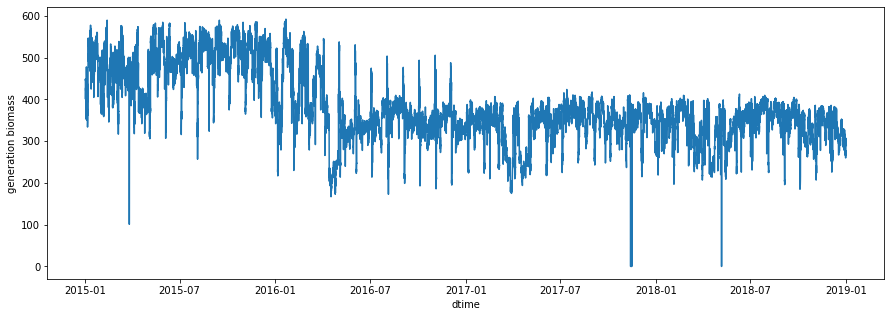

In [291]:
plt.figure(figsize=(15, 5))
sns.lineplot('dtime', 'generation biomass', data=energy_df)

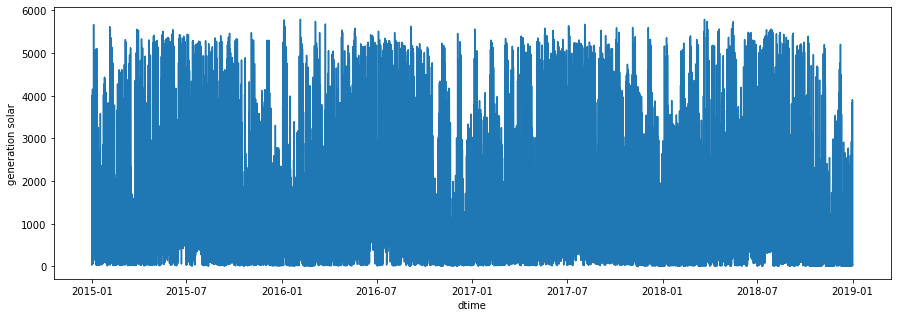

In [292]:
plt.figure(figsize=(15, 5))
sns.lineplot('dtime', 'generation solar', data=energy_df)

In [293]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 31 columns):
time                                           35064 non-null object
generation biomass                             35045 non-null float64
generation fossil brown coal/lignite           35046 non-null float64
generation fossil coal-derived gas             35046 non-null float64
generation fossil gas                          35046 non-null float64
generation fossil hard coal                    35046 non-null float64
generation fossil oil                          35045 non-null float64
generation fossil oil shale                    35046 non-null float64
generation fossil peat                         35046 non-null float64
generation geothermal                          35046 non-null float64
generation hydro pumped storage aggregated     0 non-null float64
generation hydro pumped storage consumption    35045 non-null float64
generation hydro run-of-river and poundage     35045 non

In [294]:
columns = list(energy_df.dropna().columns)
print(columns)
nix = []
for col in columns:
    print(col)
    if col == 'time':
        nix.append(col)
        continue
    elif col == 'date' or col == 'dtime':
        continue
    print(energy_df[col].sum())
    if energy_df[col].sum() == 0:
        nix.append(col)
        continue
for n in nix:
    columns.remove(n)
print(columns)

['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual', 'dtime', 'date']
time
generation biomass
13440232.0
generation fossil brown coal/lignite
15702683.0
generation fossil coal-derived gas
0.0
generation fossil gas
197054458.0
generation fo

In [295]:
clean_df = energy_df.loc[:,columns]
print(clean_df.info())
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 22 columns):
generation biomass                             35045 non-null float64
generation fossil brown coal/lignite           35046 non-null float64
generation fossil gas                          35046 non-null float64
generation fossil hard coal                    35046 non-null float64
generation fossil oil                          35045 non-null float64
generation hydro pumped storage consumption    35045 non-null float64
generation hydro run-of-river and poundage     35045 non-null float64
generation hydro water reservoir               35046 non-null float64
generation nuclear                             35047 non-null float64
generation other                               35046 non-null float64
generation other renewable                     35046 non-null float64
generation solar                               35046 non-null float64
generation waste                               3504

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,dtime,date
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00,2015-01-01
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,2015-01-01 01:00:00,2015-01-01
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,2015-01-01 02:00:00,2015-01-01
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,2015-01-01 03:00:00,2015-01-01
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,2015-01-01 04:00:00,2015-01-01


In [303]:
clean_df.dropna(inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35018 entries, 0 to 35063
Data columns (total 22 columns):
generation biomass                             35018 non-null float64
generation fossil brown coal/lignite           35018 non-null float64
generation fossil gas                          35018 non-null float64
generation fossil hard coal                    35018 non-null float64
generation fossil oil                          35018 non-null float64
generation hydro pumped storage consumption    35018 non-null float64
generation hydro run-of-river and poundage     35018 non-null float64
generation hydro water reservoir               35018 non-null float64
generation nuclear                             35018 non-null float64
generation other                               35018 non-null float64
generation other renewable                     35018 non-null float64
generation solar                               35018 non-null float64
generation waste                               3501

In [304]:
first_day = clean_df.dtime[0]
next_day = first_day + pd.Timedelta(days=1)

firstday_df = clean_df.loc[clean_df['dtime'] < next_day,:]

(array([16972.,  4749.,  2011.,  1781.,  1648.,  1711.,  1620.,  1751.,
         2124.,   651.]),
 array([   0. ,  579.2, 1158.4, 1737.6, 2316.8, 2896. , 3475.2, 4054.4,
        4633.6, 5212.8, 5792. ]),
 <a list of 10 Patch objects>)

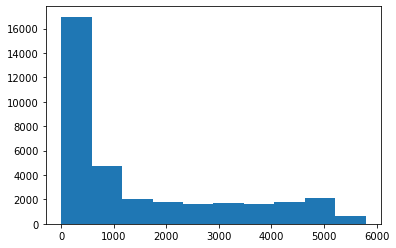

In [305]:
plt.hist(clean_df['generation solar'])

In [306]:
firstday_df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,dtime,date
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00,2015-01-01
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,2015-01-01 01:00:00,2015-01-01
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,2015-01-01 02:00:00,2015-01-01
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,2015-01-01 03:00:00,2015-01-01
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,2015-01-01 04:00:00,2015-01-01
5,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,...,188.0,4618.0,4.0,4617.0,21441.0,19905.0,35.72,53.63,2015-01-01 05:00:00,2015-01-01
6,401.0,172.0,4040.0,3368.0,158.0,2108.0,961.0,848.0,7098.0,43.0,...,186.0,4397.0,3.0,4276.0,21285.0,20010.0,35.13,51.73,2015-01-01 06:00:00,2015-01-01
7,408.0,172.0,4030.0,3208.0,160.0,2031.0,983.0,1012.0,7099.0,43.0,...,189.0,3992.0,12.0,3994.0,21545.0,20377.0,36.22,51.43,2015-01-01 07:00:00,2015-01-01
8,413.0,177.0,4052.0,3335.0,161.0,2119.0,1001.0,1015.0,7098.0,43.0,...,198.0,3629.0,39.0,3602.0,21443.0,20094.0,32.40,48.98,2015-01-01 08:00:00,2015-01-01
9,419.0,177.0,4137.0,3437.0,163.0,2170.0,1041.0,1357.0,7097.0,43.0,...,198.0,3073.0,784.0,3212.0,21560.0,20637.0,36.60,54.20,2015-01-01 09:00:00,2015-01-01


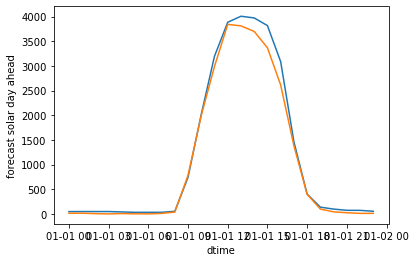

In [307]:
sns.lineplot('dtime', 'generation solar', data=firstday_df)
sns.lineplot('dtime', 'forecast solar day ahead', data=firstday_df)

In [308]:
melted_day_df = firstday_df.melt(id_vars=['date','dtime'])
melted_day_df

,date,dtime,variable,value
0,2015-01-01,2015-01-01 00:00:00,generation biomass,447.00
1,2015-01-01,2015-01-01 01:00:00,generation biomass,449.00
2,2015-01-01,2015-01-01 02:00:00,generation biomass,448.00
3,2015-01-01,2015-01-01 03:00:00,generation biomass,438.00
4,2015-01-01,2015-01-01 04:00:00,generation biomass,428.00
...,...,...,...,...
475,2015-01-01,2015-01-01 19:00:00,price actual,74.24
476,2015-01-01,2015-01-01 20:00:00,price actual,75.64
477,2015-01-01,2015-01-01 21:00:00,price actual,73.92
478,2015-01-01,2015-01-01 22:00:00,price actual,70.53


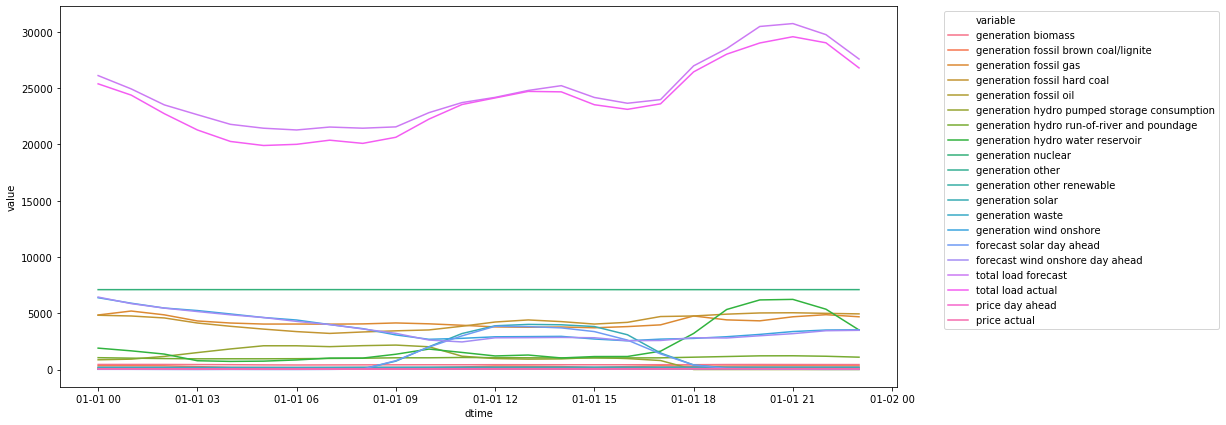

In [309]:
plt.figure(figsize=(15,7))
sns.lineplot(x='dtime', y='value', hue='variable', data=melted_day_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)         

In [310]:
try:
    weather_df = pd.read_csv('weather_features.csv')
except FileNotFoundError as e:
    print(e)
    weather_df = pd.read_csv('https://github.com/cobyoram/Thinkful_capstone_1/blob/master/weather_features.csv')

In [311]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [378]:
type(weather_df['dt_iso'][0])

str

In [312]:
weather_df['clouds_all'].describe()

count    178396.000000
mean         25.073292
std          30.774129
min           0.000000
25%           0.000000
50%          20.000000
75%          40.000000
max         100.000000
Name: clouds_all, dtype: float64

In [313]:
weather_df['city_name'].value_counts()

Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: city_name, dtype: int64

In [314]:
## !!!!!!! ASSUMPTION! I will be averaging the weather data across each city for weather vs solar generation data
## !!!!!!! ASSUMPTION! Solar generation is reported by transmission, which probably reports based on how much generation is sold, which may be less than what was actually generated in the country at any given time. We will assume that the numbers accurately represent relative production from one day to the next. 
## !!!!!!! ASSUMPTION! Same for weather. Though we only have weather data for five major cities, we will assume that they represent relative weather data over the majority of reported generating systems.

No handles with labels found to put in legend.


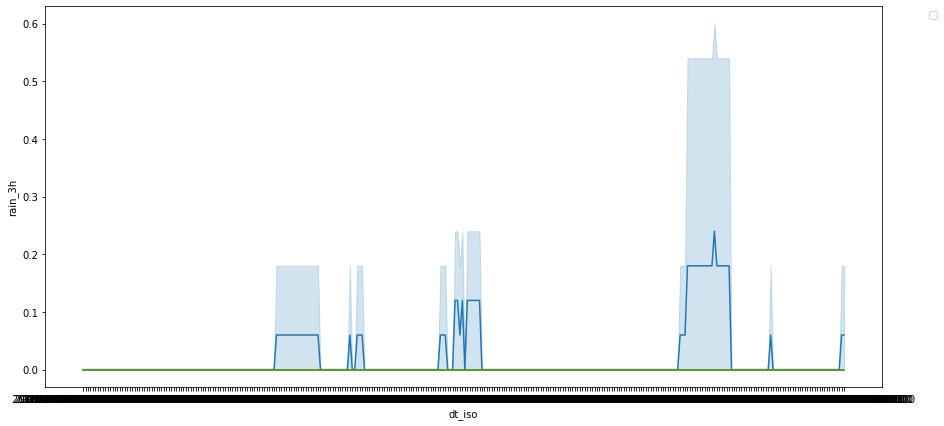

In [324]:
plt.figure(figsize=(15,7))
sns.lineplot(x='dt_iso', y='rain_1h', data=weather_df.loc[weather_df['dt_iso'] < '2015-01-14'])
sns.lineplot(x='dt_iso', y='snow_3h', data=weather_df.loc[weather_df['dt_iso'] < '2015-01-14'])
sns.lineplot(x='dt_iso', y='rain_3h', data=weather_df.loc[weather_df['dt_iso'] < '2015-01-14'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)     

No handles with labels found to put in legend.


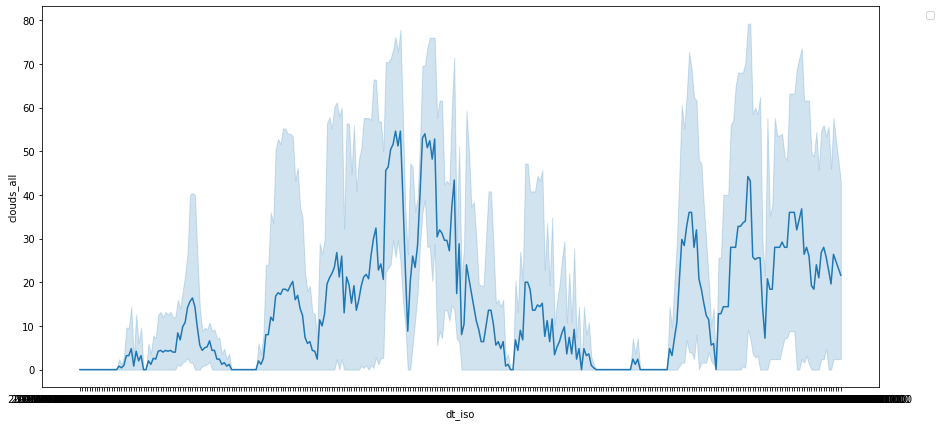

In [322]:
plt.figure(figsize=(15,7))
# sns.lineplot(x='dt_iso', y='clouds_all', hue='city_name', data=weather_df.loc[weather_df['dt_iso'] < '2015-01-07'])
sns.lineplot(x='dt_iso', y='clouds_all', data=weather_df.loc[weather_df['dt_iso'] < '2015-01-14'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)         

No handles with labels found to put in legend.


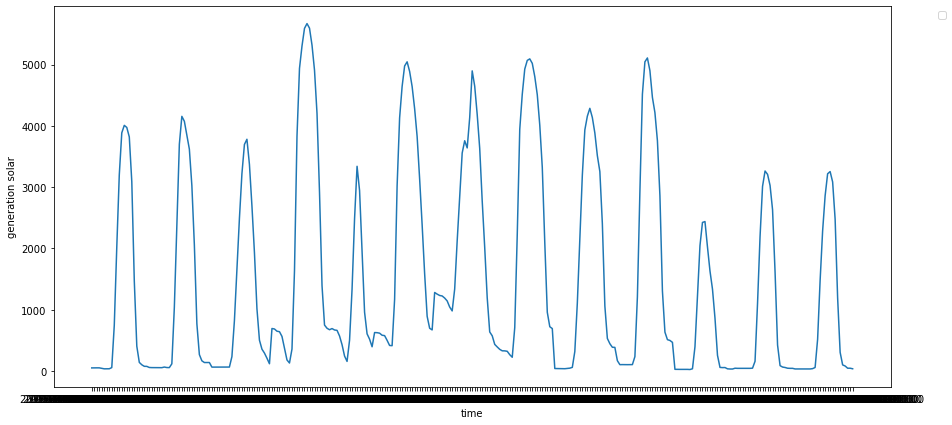

In [321]:
plt.figure(figsize=(15,7))
sns.lineplot(x='time', y='generation solar', data=energy_df.loc[energy_df['time'] < '2015-01-14'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [325]:
# Lets start fresh with a solar generation data set and cloud coverage dataset.
# Aggregate data by day? To account for nighttime?

In [326]:
raw_solar_df = pd.read_csv('energy_dataset.csv')
raw_solar_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [370]:
def strip_deltas(array):
   for i in array:
        array.replace(i, i[0:i.index('+')], inplace=True)

In [371]:
strip_deltas(raw_solar_df['time'])

AttributeError: 'Timestamp' object has no attribute 'index'

In [372]:
raw_solar_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,hour,date
0,2015-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01
1,2015-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01
2,2015-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01
3,2015-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01
4,2015-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01


In [373]:
type(raw_solar_df['time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [374]:
raw_solar_df['time'] = pd.to_datetime((raw_solar_df['time']))
raw_solar_df['date'] = raw_solar_df['time'].dt.date

In [375]:
raw_solar_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,hour,date
0,2015-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01
1,2015-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01
2,2015-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01
3,2015-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01
4,2015-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,<function <lambda> at 0x0000015974F5AEA0>,2015-01-01


In [376]:
solar_df = pd.DataFrame(data=raw_solar_df, columns=['date','time','generation solar'])
solar_df

,date,time,generation solar
0,2015-01-01,2015-01-01 00:00:00,49.0
1,2015-01-01,2015-01-01 01:00:00,50.0
2,2015-01-01,2015-01-01 02:00:00,50.0
3,2015-01-01,2015-01-01 03:00:00,50.0
4,2015-01-01,2015-01-01 04:00:00,42.0
...,...,...,...
35059,2018-12-31,2018-12-31 19:00:00,85.0
35060,2018-12-31,2018-12-31 20:00:00,33.0
35061,2018-12-31,2018-12-31 21:00:00,31.0
35062,2018-12-31,2018-12-31 22:00:00,31.0


(array([16989.,  4753.,  2012.,  1781.,  1650.,  1712.,  1623.,  1751.,
         2124.,   651.]),
 array([   0. ,  579.2, 1158.4, 1737.6, 2316.8, 2896. , 3475.2, 4054.4,
        4633.6, 5212.8, 5792. ]),
 <a list of 10 Patch objects>)

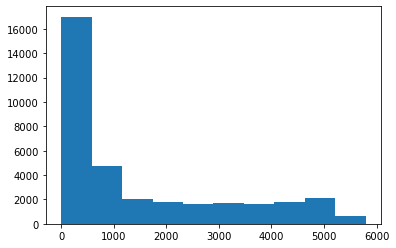

In [377]:
plt.hist(solar_df['generation solar'])